# Project Name :- Churn Reduction

# importing data 

In [1]:
#loading libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import KNN
from scipy.stats import chi2_contingency
from sklearn.cross_validation import train_test_split

from imblearn.over_sampling import SMOTE




C:\Users\ARON\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\ARON\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB


C:\Users\ARON\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
% matplotlib inline

In [4]:
# loading data

os.chdir("C:/Users/ARON/Desktop/edwisor projects/Churn")
os.getcwd()

train_original=pd.read_csv("Train_data.csv")
test_original=pd.read_csv("Test_data.csv")


#creating a copy of train and test data

train=train_original.copy()
test=test_original.copy()




# Exploring data

In [5]:
train.head(5)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge   ...     total eve calls  total eve charge  \
0             45.07   ...                  99             16.78   
1             27.47   ...                 103             16.62   
2             41.38   ...                 110             10.30   
3             50.90   ...                  88              5.26   
4             28.34   ...                 122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number customer service calls    Churn  
0                              1   False.  
1                              1   False.  
2                              0   False.  
3                              2   False.  
4                              3   False.  

[5 rows x 21 columns]

In [6]:
train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [7]:
#let us remove the space in the variable name
train.columns=train.columns.str.replace(' ','')
test.columns=test.columns.str.replace(' ','')

In [8]:
test.columns

Index(['state', 'accountlength', 'areacode', 'phonenumber',
       'internationalplan', 'voicemailplan', 'numbervmailmessages',
       'totaldayminutes', 'totaldaycalls', 'totaldaycharge', 'totaleveminutes',
       'totalevecalls', 'totalevecharge', 'totalnightminutes',
       'totalnightcalls', 'totalnightcharge', 'totalintlminutes',
       'totalintlcalls', 'totalintlcharge', 'numbercustomerservicecalls',
       'Churn'],
      dtype='object')

In [9]:
train.shape

(3333, 21)

In [10]:
test.shape

(1667, 21)

In [11]:
#let us see the no of unique values in the data 

for i in train.columns:
    print(i,'->',len(train[i].value_counts()))

state -> 51
accountlength -> 212
areacode -> 3
phonenumber -> 3333
internationalplan -> 2
voicemailplan -> 2
numbervmailmessages -> 46
totaldayminutes -> 1667
totaldaycalls -> 119
totaldaycharge -> 1667
totaleveminutes -> 1611
totalevecalls -> 123
totalevecharge -> 1440
totalnightminutes -> 1591
totalnightcalls -> 120
totalnightcharge -> 933
totalintlminutes -> 162
totalintlcalls -> 21
totalintlcharge -> 162
numbercustomerservicecalls -> 10
Churn -> 2


In [12]:
train.dtypes

state                          object
accountlength                   int64
areacode                        int64
phonenumber                    object
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
Churn                          object
dtype: object

In [13]:
#let us convert area code and Number of customer service calls into categorical, which are originally in continuos dtype

train['areacode']=train['areacode'].astype('object')
test['areacode']=test['areacode'].astype('object')

train['numbercustomerservicecalls']=train['numbercustomerservicecalls'].astype('object')
test['numbercustomerservicecalls']=test['numbercustomerservicecalls'].astype('object')


In [14]:
#since phone number doesnt explain much about the customer churnig status,let us remove phone number

train=train.drop('phonenumber',axis=1)
test=test.drop('phonenumber',axis=1)

# DATA VISUALIZATION

In [15]:
#UNIVARIATE ANALYSIS

In [15]:
train['Churn'].value_counts(normalize=True)

 False.    0.855086
 True.     0.144914
Name: Churn, dtype: float64

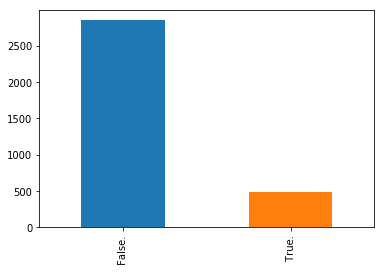

In [16]:
train['Churn'].value_counts().plot.bar()

In [18]:
#we clearly that this is a class imbalance problem as numbe of customers in the data has more not churning customers


In [17]:
train.dtypes

state                          object
accountlength                   int64
areacode                       object
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls     object
Churn                          object
dtype: object

In [18]:
train.columns

Index(['state', 'accountlength', 'areacode', 'internationalplan',
       'voicemailplan', 'numbervmailmessages', 'totaldayminutes',
       'totaldaycalls', 'totaldaycharge', 'totaleveminutes', 'totalevecalls',
       'totalevecharge', 'totalnightminutes', 'totalnightcalls',
       'totalnightcharge', 'totalintlminutes', 'totalintlcalls',
       'totalintlcharge', 'numbercustomerservicecalls', 'Churn'],
      dtype='object')

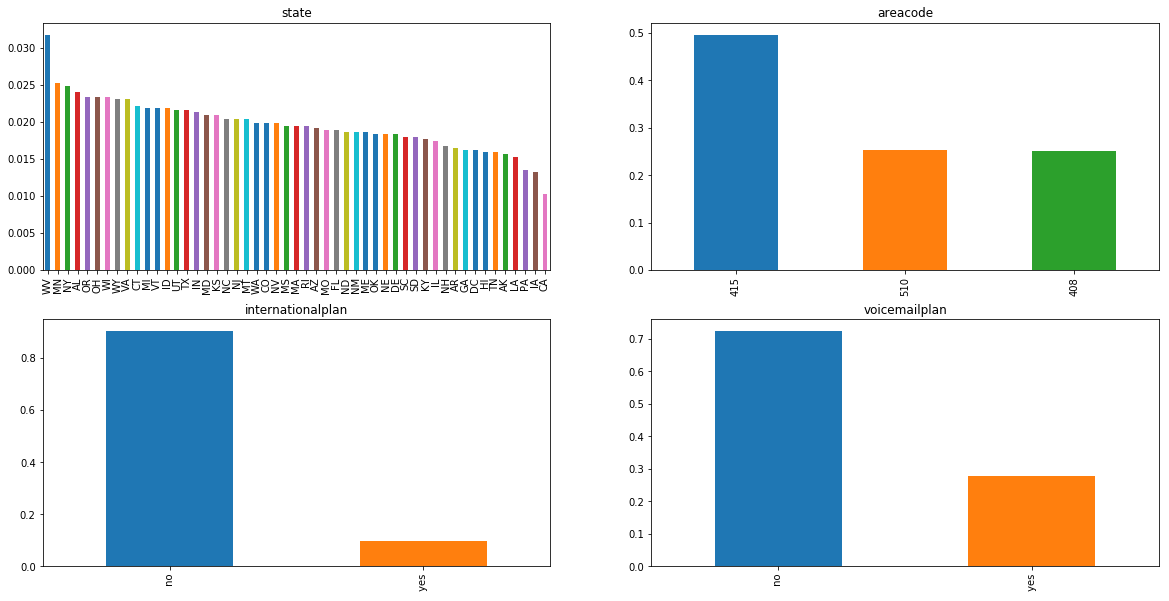

In [19]:
#let us visualze categorical variables

plt.figure(1)
plt.subplot(221)
train['state'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='state')

plt.subplot(222)
train['areacode'].value_counts(normalize=True).plot.bar(title='areacode')

plt.subplot(223)
train['internationalplan'].value_counts(normalize=True).plot.bar(title='internationalplan')

plt.subplot(224)
train['voicemailplan'].value_counts(normalize=True).plot.bar(title='voicemailplan')

In [22]:
# we see that the international plan and voice mail has the data which is not balanced

C:\Users\ARON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ARON\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and h

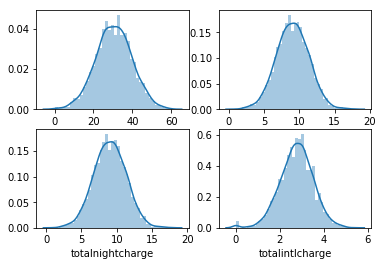

In [20]:
#let us visualize numeric data

plt.figure(1)
plt.subplot(221)
sns.distplot(train['totaldaycharge'])

plt.subplot(222)
sns.distplot(train['totalnightcharge'])

plt.subplot(223)
sns.distplot(train['totalnightcharge'])

plt.subplot(224)
sns.distplot(train['totalintlcharge'])


In [24]:
# we see that the most data is normally distributed

In [25]:
#BIVARIATE ANALYSIS

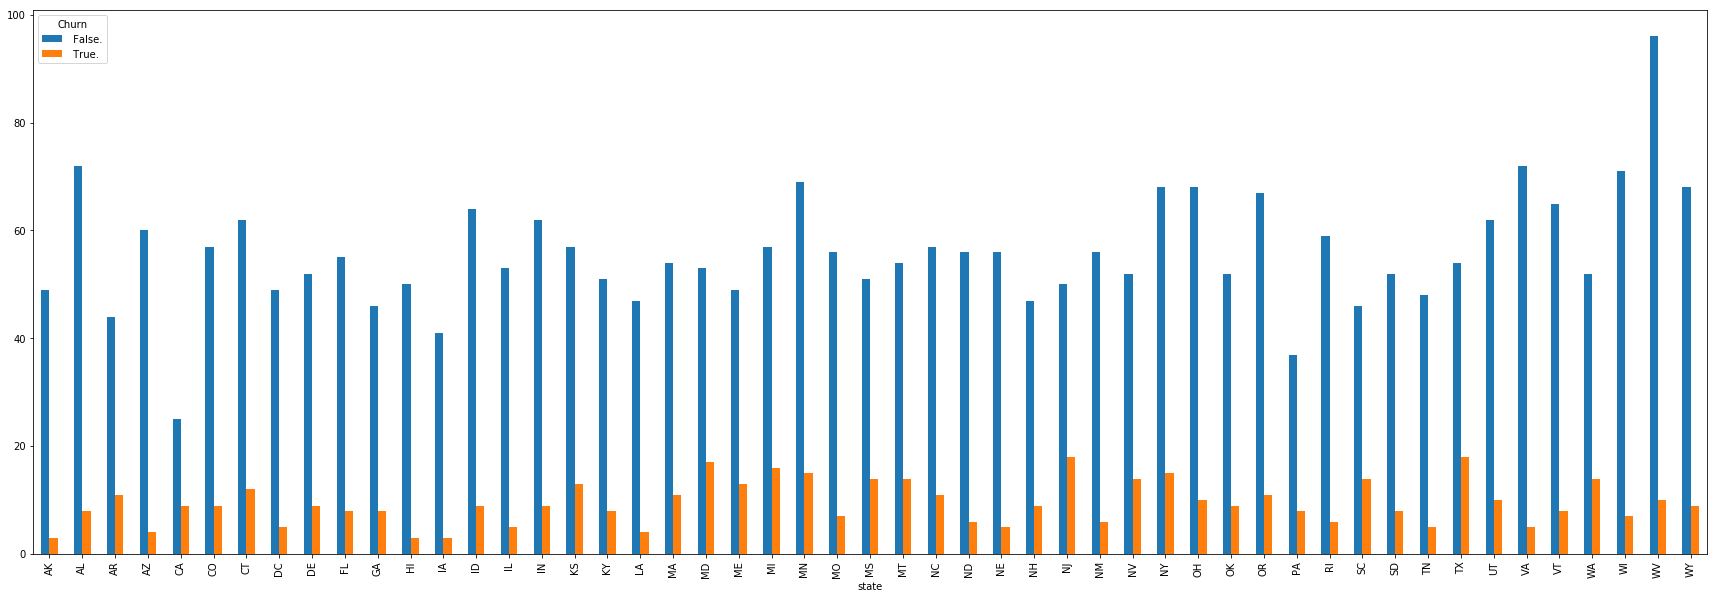

In [21]:
train.groupby(["state", "Churn"]).size().unstack(level=1).plot(kind='bar', figsize=(30,10))


In [22]:
#let us see between diffrent categorical variables by using following function


def diff_bar(x,y):
    train.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(30,10))
    plt.xlabel(x, fontsize=20)
    plt.ylabel(y, fontsize=20)
    plt.show()

In [23]:
train.columns

Index(['state', 'accountlength', 'areacode', 'internationalplan',
       'voicemailplan', 'numbervmailmessages', 'totaldayminutes',
       'totaldaycalls', 'totaldaycharge', 'totaleveminutes', 'totalevecalls',
       'totalevecharge', 'totalnightminutes', 'totalnightcalls',
       'totalnightcharge', 'totalintlminutes', 'totalintlcalls',
       'totalintlcharge', 'numbercustomerservicecalls', 'Churn'],
      dtype='object')

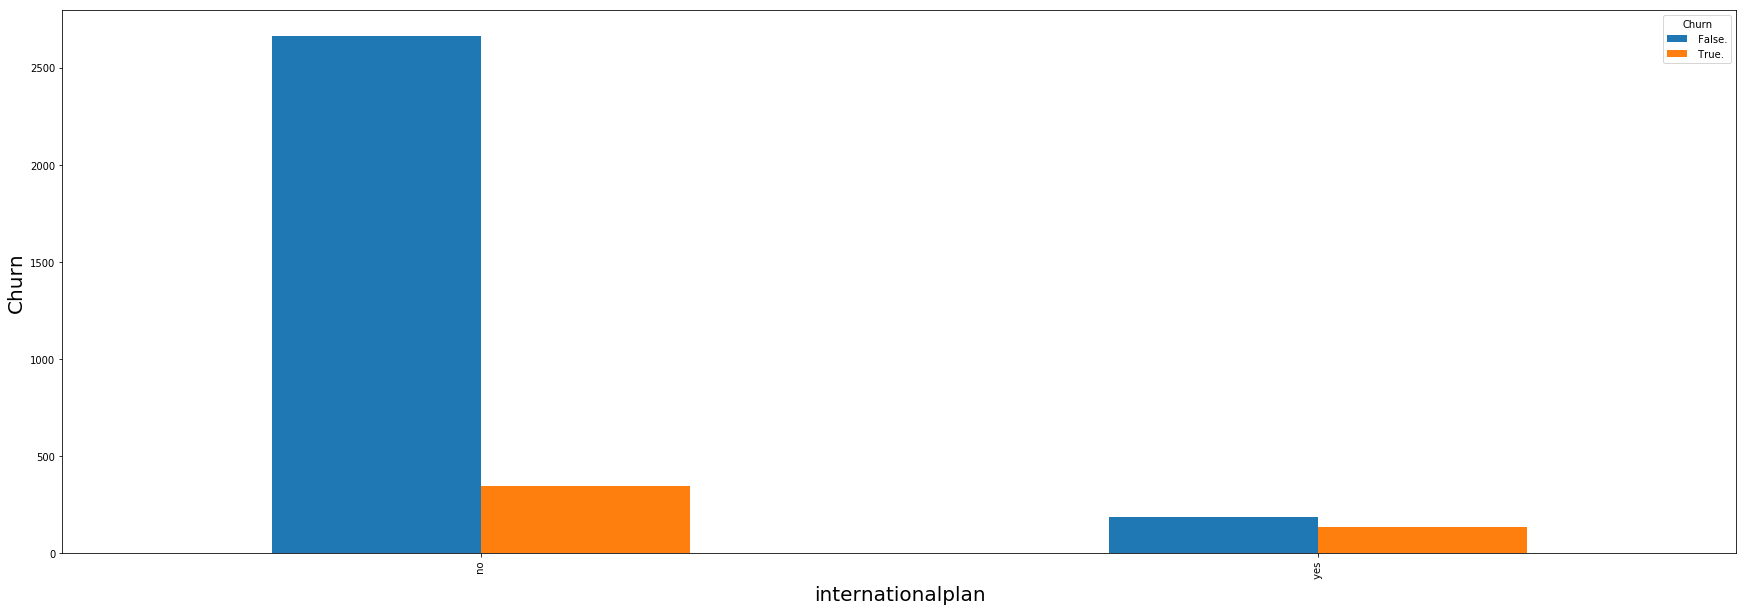

In [24]:
diff_bar('internationalplan','Churn')

#we see that most of the custmoers having international plan are churning.

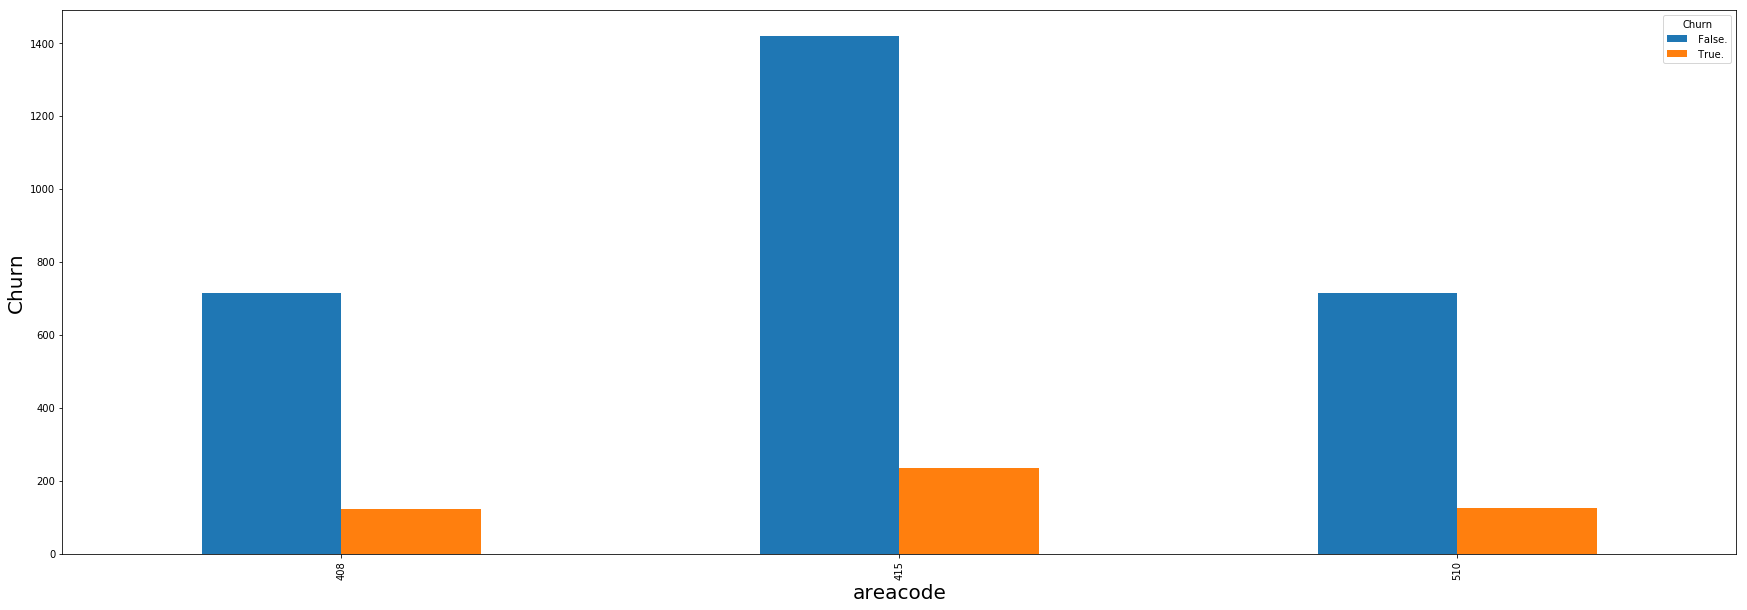

In [25]:
diff_bar('areacode','Churn')

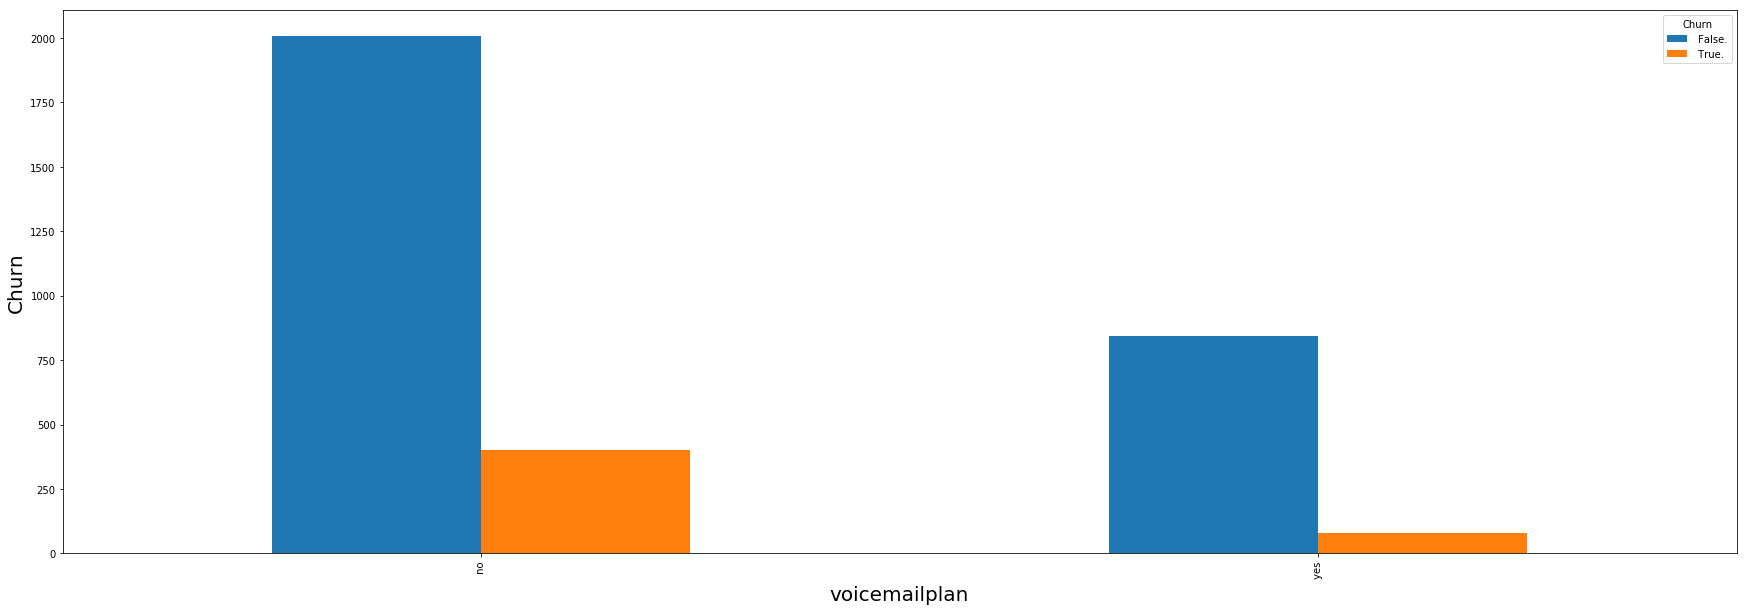

In [26]:
diff_bar('voicemailplan','Churn')
#more number of custmoers dont have voice mail plan and churning rate is less


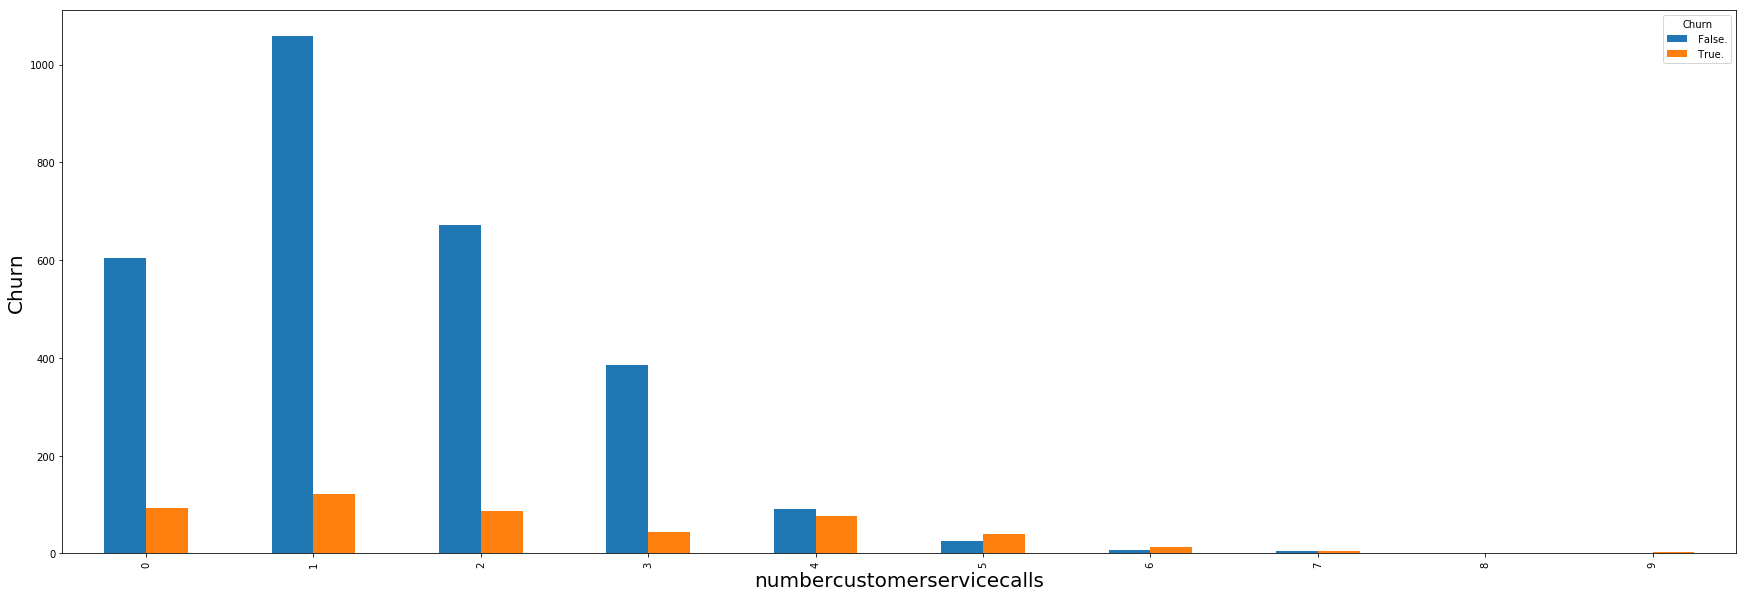

In [28]:
diff_bar('numbercustomerservicecalls','Churn')


#we see that more the number of calls more the churning 

<Figure size 432x288 with 0 Axes>

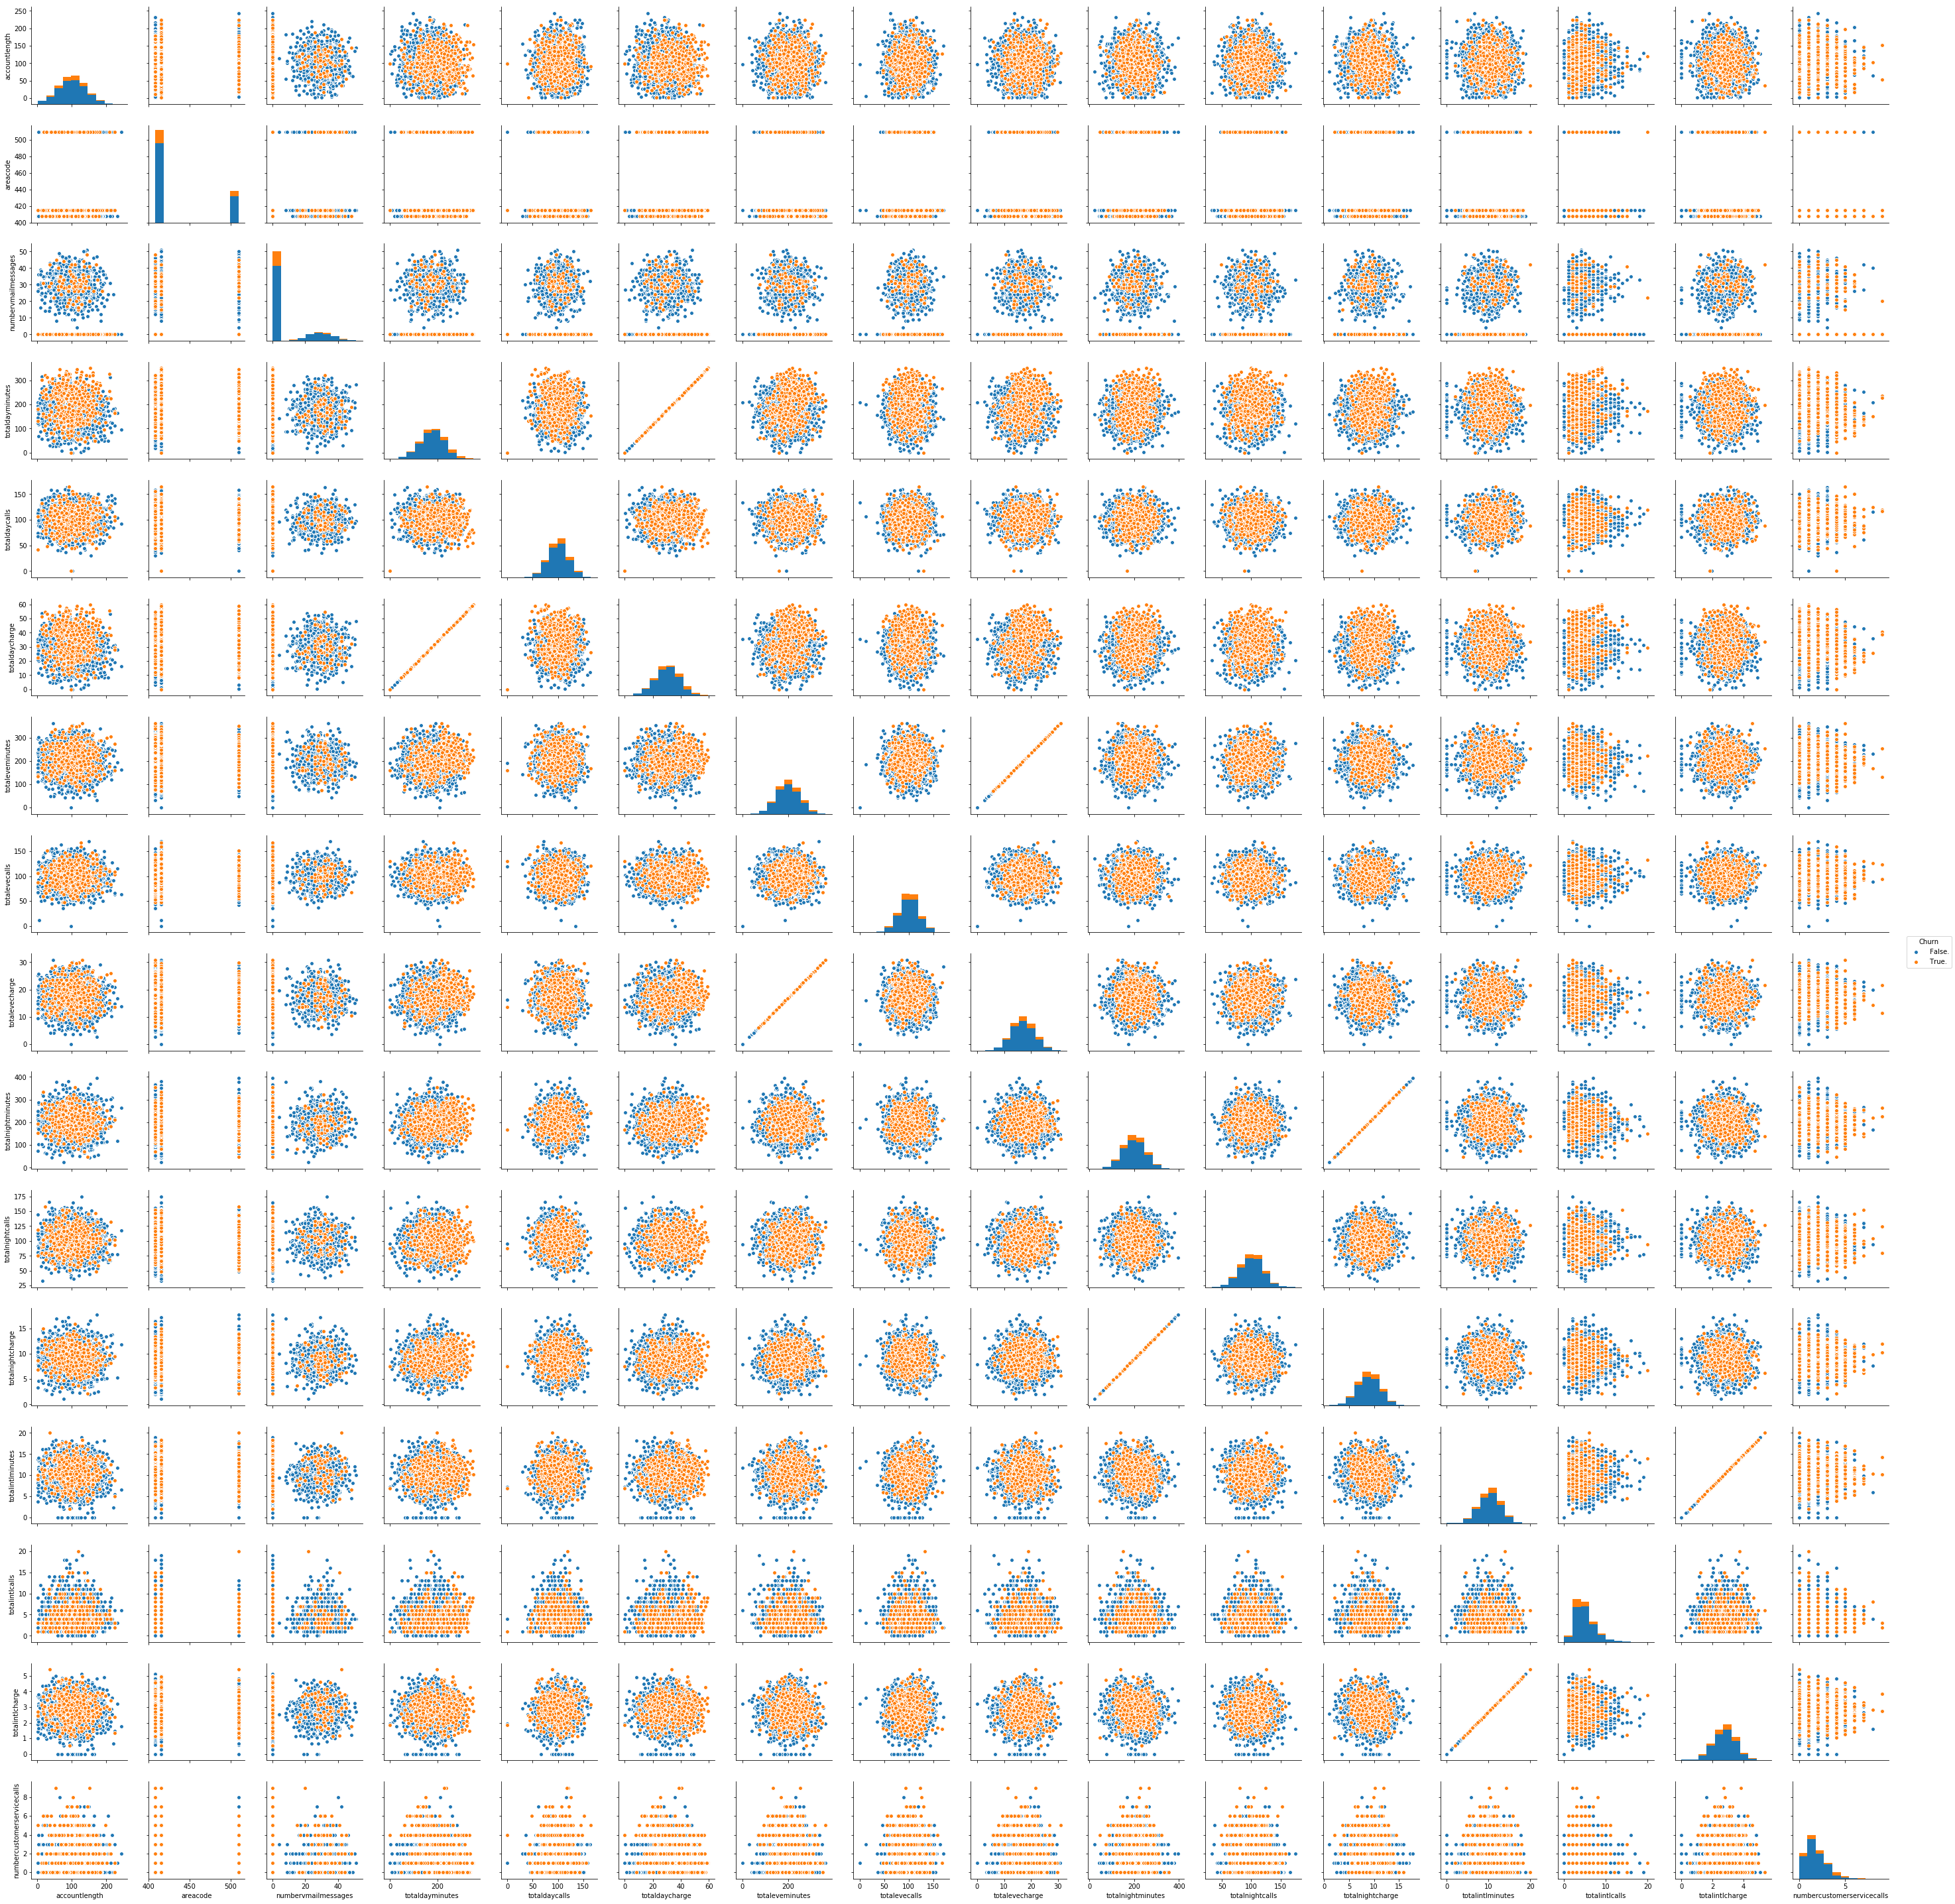

In [29]:
#let us see between different continuos variables

fig = plt.figure()
fig = sns.pairplot(train,hue='Churn',size=2.5)
plt.show()

In [34]:
#so the most of the data is uniformly distributed and total day charge and day minutes are correlated

#EDA

In [30]:
#let us put all continues variables in cname and categorical in cat name
cname = train.columns[(train.dtypes=="float64")|(train.dtypes=="int64")].tolist()
catname = train.columns[(train.dtypes=="object")].tolist()


In [31]:
#let us remove the target variable

catname.remove('Churn')

In [32]:
cname

['accountlength',
 'numbervmailmessages',
 'totaldayminutes',
 'totaldaycalls',
 'totaldaycharge',
 'totaleveminutes',
 'totalevecalls',
 'totalevecharge',
 'totalnightminutes',
 'totalnightcalls',
 'totalnightcharge',
 'totalintlminutes',
 'totalintlcalls',
 'totalintlcharge']

In [33]:
catname

['state',
 'areacode',
 'internationalplan',
 'voicemailplan',
 'numbercustomerservicecalls']

In [35]:
train.dtypes

state                          object
accountlength                   int64
areacode                       object
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls     object
Churn                          object
dtype: object

In [36]:
#let us convert the categorical values in numeric codes by using following function


def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [38]:
cat_to_num(train)
cat_to_num(test)

state  accountlength areacode internationalplan voicemailplan  \
0       11            101        2                 0             0   
1       26            137        2                 0             0   
2       35            103        0                 0             1   
3       32             99        1                 0             0   
4       40            108        1                 0             0   
5       12            117        1                 0             0   
6       28             63        1                 0             1   
7       18             94        0                 0             0   
8       24            138        2                 0             0   
9       43            128        1                 0             1   
10       2            113        2                 0             1   
11      43            140        1                 0             0   
12      21            102        1                 0             0   
13      28            108        1                 0             0   
14       8             60        0                 0             0   
15      23             96        0                 0             0   
16      16            178        1                 0             1   
17      23             75        1                 0             0   
18      27            106        1                 0             1   
19      11            158        2                 0             0   
20      33            111        1                 0             1   
21       5            102        2                 0             0   
22      42             92        2                 0             1   
23       8             42        1                 0             1   
24      35             69        1                 0             0   
25      37            117        1                 0             1   
26      29             76        1                 0             1   
27      13             72        1                 1             0   
28      50            115        1                 1             1   
29      20             68        0                 0             0   
...    ...            ...      ...               ...           ...   
1637    20            133        1                 0             0   
1638    11            128        2                 0             1   
1639     9             81        0                 0             0   
1640    28             81        1                 0             0   
1641    18             96        0                 0             0   
1642     2             93        1                 0             0   
1643    17            145        0                 0             0   
1644    11             53        2                 1             0   
1645    16            108        0                 0             0   
1646    43             52        1                 0             0   
1647    47             73        0                 0             0   
1648    27             61        2                 0             0   
1649    43             86        0                 0             0   
1650    18            137        0                 0             0   
1651    42             74        2                 0             0   
1652    27            118        2                 0             1   
1653    35            125        1                 0             0   
1654     2            127        1                 0             1   
1655    47             80        2                 0             0   
1656    23            150        0                 0             0   
1657    28            140        2                 0             0   
1658     3             97        2                 0             0   
1659    26             83        1                 0             0   
1660    49             73        0                 0             0   
1661    27             75        0                 0             0   
1662    11     

# MISSING VALUE ANALYSIS

In [39]:
# let us see if there are any mising values in train data

train.isnull().sum()

state                         0
accountlength                 0
areacode                      0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
Churn                         0
dtype: int64

In [40]:
# let us see if there are any mising values in test data

test.isnull().sum()

state                         0
accountlength                 0
areacode                      0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
Churn                         0
dtype: int64

In [44]:
# we see that there aren't any missing values in train or test data

# OUTLIER ANALYSIS

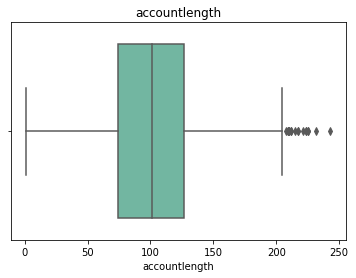

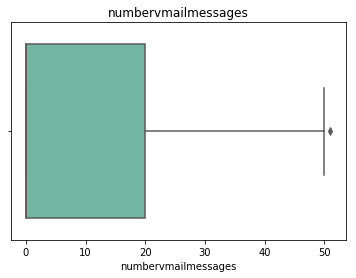

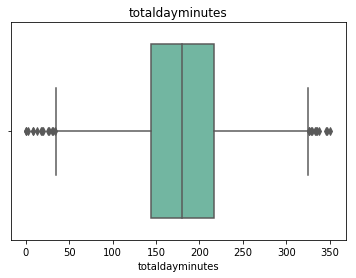

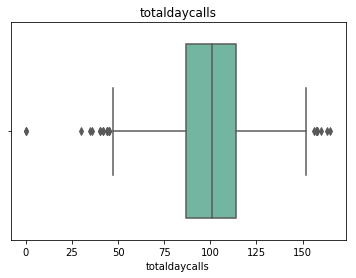

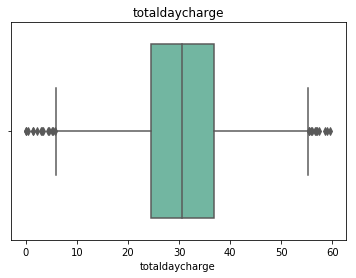

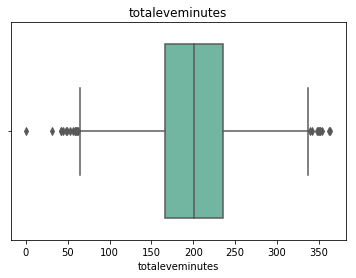

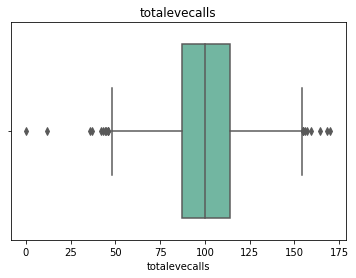

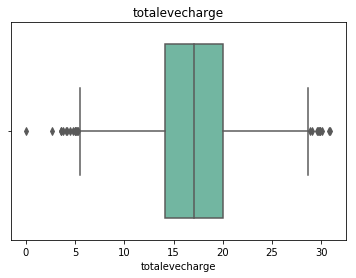

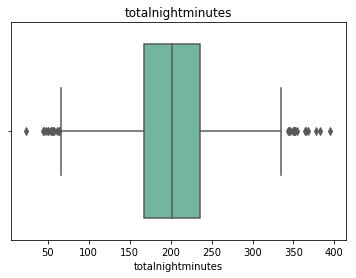

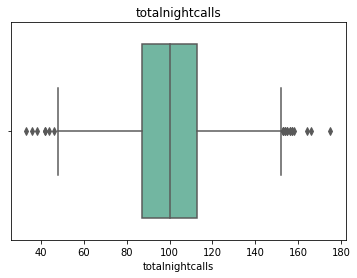

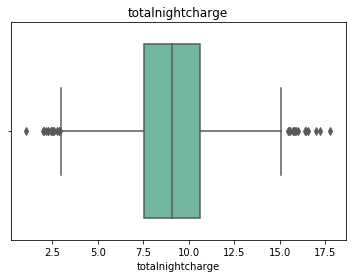

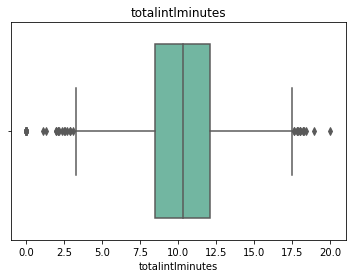

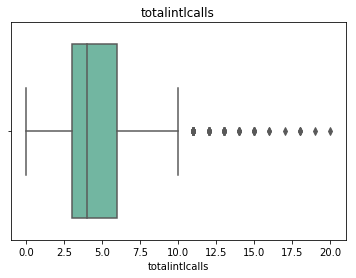

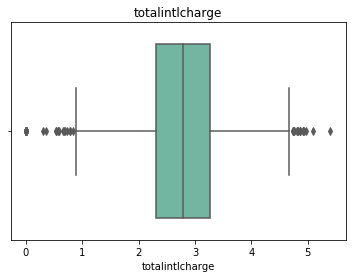

In [41]:
#  #Plot Box Plot
    
    
for i in cname:
    plt.figure()
    sns.boxplot(train[i],palette="Set2")
    plt.title(i)
    plt.show()

In [43]:
#treating outliers

for i in cname:
    #print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
# Converting them to nan
    train.loc[train.loc[:,i] < minn,i] = np.nan
    train.loc[train.loc[:,i] > maxx,i] = np.nan
    print('{var} --------- :- {X}   Missing'.format(var = i, X = (train.loc[:,i].isnull().sum())))

accountlength --------- :- 18   Missing
numbervmailmessages --------- :- 1   Missing
totaldayminutes --------- :- 25   Missing
totaldaycalls --------- :- 23   Missing
totaldaycharge --------- :- 25   Missing
totaleveminutes --------- :- 24   Missing
totalevecalls --------- :- 20   Missing
totalevecharge --------- :- 24   Missing
totalnightminutes --------- :- 30   Missing
totalnightcalls --------- :- 22   Missing
totalnightcharge --------- :- 30   Missing
totalintlminutes --------- :- 46   Missing
totalintlcalls --------- :- 78   Missing
totalintlcharge --------- :- 49   Missing


In [44]:
#Apply KNN imputation algorithm for imputing missing values
train = pd.DataFrame(KNN(k = 3).complete(train), columns = train.columns)

Imputing row 1/3333 with 0 missing, elapsed time: 3.888
Imputing row 101/3333 with 0 missing, elapsed time: 3.937
Imputing row 201/3333 with 0 missing, elapsed time: 3.937
Imputing row 301/3333 with 0 missing, elapsed time: 3.937
Imputing row 401/3333 with 0 missing, elapsed time: 3.937
Imputing row 501/3333 with 0 missing, elapsed time: 3.937
Imputing row 601/3333 with 0 missing, elapsed time: 3.953
Imputing row 701/3333 with 0 missing, elapsed time: 3.953
Imputing row 801/3333 with 0 missing, elapsed time: 3.953
Imputing row 901/3333 with 0 missing, elapsed time: 3.953
Imputing row 1001/3333 with 0 missing, elapsed time: 3.953
Imputing row 1101/3333 with 0 missing, elapsed time: 3.953
Imputing row 1201/3333 with 1 missing, elapsed time: 3.953
Imputing row 1301/3333 with 0 missing, elapsed time: 3.968
Imputing row 1401/3333 with 2 missing, elapsed time: 3.968
Imputing row 1501/3333 with 0 missing, elapsed time: 3.968
Imputing row 1601/3333 with 0 missing, elapsed time: 3.968
Imputing 

In [45]:
for i in catname:
    #print(i)
    train[i] = train[i].astype('object')

#Checking Missing value
print(train[cname].isnull().sum())

accountlength          0
numbervmailmessages    0
totaldayminutes        0
totaldaycalls          0
totaldaycharge         0
totaleveminutes        0
totalevecalls          0
totalevecharge         0
totalnightminutes      0
totalnightcalls        0
totalnightcharge       0
totalintlminutes       0
totalintlcalls         0
totalintlcharge        0
dtype: int64


In [47]:
train.dtypes

state                          object
accountlength                 float64
areacode                       object
internationalplan              object
voicemailplan                  object
numbervmailmessages           float64
totaldayminutes               float64
totaldaycalls                 float64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                 float64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls               float64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                float64
totalintlcharge               float64
numbercustomerservicecalls     object
Churn                         float64
dtype: object

In [48]:
train.dtypes

state                          object
accountlength                 float64
areacode                       object
internationalplan              object
voicemailplan                  object
numbervmailmessages           float64
totaldayminutes               float64
totaldaycalls                 float64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                 float64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls               float64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                float64
totalintlcharge               float64
numbercustomerservicecalls     object
Churn                         float64
dtype: object

# FEATURE SELECTION

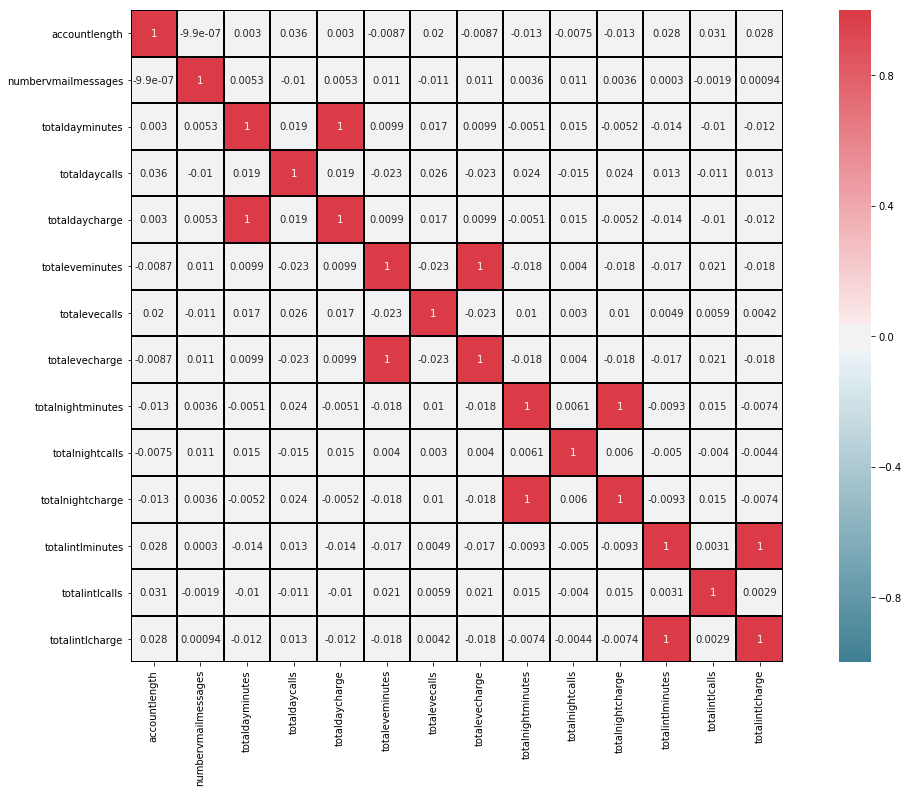

In [49]:
# Correlation matrix

#generating correlation matrix
corr = train[cname].corr()

#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(20,12)) 

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

In [50]:
#chi square for categorical variables

for i in catname:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train['Churn'], train[i]))
    print(p)
    
    #we see that state has p value less than 0.05 so we remove that

state
0.002296221552011188
areacode
0.9150556960243712
internationalplan
2.4931077033159556e-50
voicemailplan
5.15063965903898e-09
numbercustomerservicecalls
2.243376519451563e-68


In [51]:
train=train.drop(['state','totaldaycharge','totalevecharge','totalnightcharge','totalintlcharge'],axis=1)
test=test.drop(['state','totaldaycharge','totalevecharge','totalnightcharge','totalintlcharge'],axis=1)

In [53]:
cname = train.columns[(train.dtypes=="float64")|(train.dtypes=="int64")].tolist()
catname = train.columns[(train.dtypes=="object")].tolist()
#catname.remove('Churn')


In [ ]:
cname.remove('Churn')

In [56]:
cname

['accountlength',
 'numbervmailmessages',
 'totaldayminutes',
 'totaldaycalls',
 'totaleveminutes',
 'totalevecalls',
 'totalnightminutes',
 'totalnightcalls',
 'totalintlminutes',
 'totalintlcalls']

In [57]:
catname

['areacode',
 'internationalplan',
 'voicemailplan',
 'numbercustomerservicecalls']

In [58]:
train.dtypes

accountlength                 float64
areacode                       object
internationalplan              object
voicemailplan                  object
numbervmailmessages           float64
totaldayminutes               float64
totaldaycalls                 float64
totaleveminutes               float64
totalevecalls                 float64
totalnightminutes             float64
totalnightcalls               float64
totalintlminutes              float64
totalintlcalls                float64
numbercustomerservicecalls     object
Churn                         float64
dtype: object

In [59]:
train.dtypes

accountlength                 float64
areacode                       object
internationalplan              object
voicemailplan                  object
numbervmailmessages           float64
totaldayminutes               float64
totaldaycalls                 float64
totaleveminutes               float64
totalevecalls                 float64
totalnightminutes             float64
totalnightcalls               float64
totalintlminutes              float64
totalintlcalls                float64
numbercustomerservicecalls     object
Churn                         float64
dtype: object

# FEATURE SCALING

In [60]:
#As we saw in the data visualization part, most of the data is normally distributed, so let us do standartization  using following function

def standardization(df):
    for i in cname:
        print(i)
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df



In [61]:
train = standardization(train)
test = standardization(test)

accountlength
numbervmailmessages
totaldayminutes
totaldaycalls
totaleveminutes
totalevecalls
totalnightminutes
totalnightcalls
totalintlminutes
totalintlcalls
accountlength
numbervmailmessages
totaldayminutes
totaldaycalls
totaleveminutes
totalevecalls
totalnightminutes
totalnightcalls
totalintlminutes
totalintlcalls


In [62]:
test.head()

accountlength areacode internationalplan voicemailplan  \
0       0.059728        2                 0             0   
1       0.973416        2                 0             0   
2       0.110488        0                 0             1   
3       0.008968        1                 0             0   
4       0.237390        1                 0             0   

   numbervmailmessages  totaldayminutes  totaldaycalls  totaleveminutes  \
0            -0.534011        -2.093906       1.230541         0.237908   
1            -0.534011         0.801860      -0.683865         0.892858   
2             1.657103         2.150183      -0.218199         0.743553   
3            -0.534011         0.672906       1.230541        -1.464165   
4            -0.534011         0.305009      -1.097790        -1.511942   

   totalevecalls  totalnightminutes  totalnightcalls  totalintlminutes  \
0      -1.392424           0.725042        -1.281157          0.107148   
1       1.968418          -2.086386        -0.895009         -0.300311   
2       0.237075           1.999899         1.325343          1.255441   
3      -0.628596           0.419710        -0.846740          1.996275   
4       0.033388           0.100500         0.359972         -0.967062   

   totalintlcalls numbercustomerservicecalls Churn  
0       -0.550528                          3     0  
1        1.084626                          0     0  
2        0.675838                          1     0  
3       -0.959317                          1     0  
4       -0.141740                          2     0

In [63]:
train.dtypes

accountlength                 float64
areacode                       object
internationalplan              object
voicemailplan                  object
numbervmailmessages           float64
totaldayminutes               float64
totaldaycalls                 float64
totaleveminutes               float64
totalevecalls                 float64
totalnightminutes             float64
totalnightcalls               float64
totalintlminutes              float64
totalintlcalls                float64
numbercustomerservicecalls     object
Churn                         float64
dtype: object

In [64]:
test.dtypes

accountlength                 float64
areacode                       object
internationalplan              object
voicemailplan                  object
numbervmailmessages           float64
totaldayminutes               float64
totaldaycalls                 float64
totaleveminutes               float64
totalevecalls                 float64
totalnightminutes             float64
totalnightcalls               float64
totalintlminutes              float64
totalintlcalls                float64
numbercustomerservicecalls     object
Churn                          object
dtype: object

# SAMPLING OF DATA

In [65]:
#sampling using train test split
X = train.iloc[:,:14]
Y = train.iloc[:,14]
Y=Y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [66]:
(X_train.shape),(Y_test.shape)

((2233, 14), (1100,))

In [67]:
Y_train.value_counts()

0    1916
1     317
Name: Churn, dtype: int64

In [65]:
#we see that there is class imbalance, so we use SMOTE for balancing class

In [68]:
# from imblearn.over_sampling import SMOTE
 
Smote = SMOTE(random_state=101)
X_train_sm, Y_train_sm = Smote.fit_sample(X_train,Y_train)

In [69]:
Y_train_sm

array([0, 0, 0, ..., 1, 1, 1])

# MODEL DEVELOPEMENT

#DECISION TREE

In [70]:
#Decision Tree
DT_model= tree.DecisionTreeClassifier(criterion='entropy').fit(X_train_sm,Y_train_sm)
#predict new test cases
DT_pred=DT_model.predict(X_test)


In [71]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(Y_test, DT_pred)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

print("CONFUSION MATRIX->")
print(CM)



CONFUSION MATRIX->
col_0    0    1
Churn          
0      870   64
1       53  113


In [73]:
#CLASSIFICATION METRICS

print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('True Negative Rate :- ',round((TN*100)/(TN+FP),2))
print('True Positive Rate :- ',round((TP*100)/(FN+TP),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))


Accuracy :-  89.36
True Negative Rate :-  93.15
True Positive Rate :-  68.07
False Negative Rate :-  31.93
False Postive Rate :-  6.85


In [71]:
# for decision tree, the classification metrics are as follows

# Accuracy :-  89.36
# True Negative Rate :-  93.15
# True Positive Rate :-  68.07
# False Negative Rate :-  31.93
# False Postive Rate :-  6.85

#RANDOM FOREST

In [74]:
#BUILDING RANDOM FOREST MODEL
RF_model = RandomForestClassifier(n_estimators = 700).fit(X_train_sm,Y_train_sm)

#PREDICTIONG FOR TEST DATA
RF_Pred = RF_model.predict(X_test)

In [75]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(Y_test, RF_Pred)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

print("CONFUSION MATRIX->")
print(CM)


CONFUSION MATRIX->
col_0    0    1
Churn          
0      892   42
1       52  114


In [76]:
#CLASSIFICATION METRICS

print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('True Negative Rate :- ',round((TN*100)/(TN+FP),2))
print('True Positive Rate :- ',round((TP*100)/(FN+TP),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))


Accuracy :-  91.45
True Negative Rate :-  95.5
True Positive Rate :-  68.67
False Negative Rate :-  31.33
False Postive Rate :-  4.5


In [75]:
# for decision tree, the classification metrics are as follows

# Accuracy :-  91.45
# True Negative Rate :-  95.5
# True Positive Rate :-  68.67
# False Negative Rate :-  31.33
# False Postive Rate :-  4.5

#LOGISTIC REGRESSION

In [80]:
#BUILDING LOGISTIC REGRESSION MODEL
lr_model = LogisticRegression(random_state=101).fit(X_train_sm,Y_train_sm)

#PREDICTIONG FOR TEST DATA
lr_pred = lr_model.predict(X_test)

In [81]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(Y_test, lr_pred)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

print("CONFUSION MATRIX->")
print(CM)


CONFUSION MATRIX->
col_0    0    1
Churn          
0      712  222
1       52  114


In [82]:
#CLASSIFICATION METRICS

print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('True Negative Rate :- ',round((TN*100)/(TN+FP),2))
print('True Positive Rate :- ',round((TP*100)/(FN+TP),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

Accuracy :-  75.09
True Negative Rate :-  76.23
True Positive Rate :-  68.67
False Negative Rate :-  31.33
False Postive Rate :-  23.77


In [79]:
# for decision tree, the classification metrics are as follows
 

# Accuracy :-  75.09
# True Negative Rate :-  76.23
# True Positive Rate :-  68.67
# False Negative Rate :-  31.33
# False Postive Rate :-  23.77

In [83]:
#BUILDING KNN MODEL
KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train_sm,Y_train_sm)
#PREDICTIONG FOR TEST DATA
knn_pred = KNN_model.predict(X_test)

In [84]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(Y_test, knn_pred)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

print("CONFUSION MATRIX->")
print(CM)


CONFUSION MATRIX->
col_0    0    1
Churn          
0      696  238
1       57  109


In [85]:
#CLASSIFICATION METRICS

print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('True Negative Rate :- ',round((TN*100)/(TN+FP),2))
print('True Positive Rate :- ',round((TP*100)/(FN+TP),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

Accuracy :-  73.18
True Negative Rate :-  74.52
True Positive Rate :-  65.66
False Negative Rate :-  34.34
False Postive Rate :-  25.48


In [83]:
# for decision tree, the classification metrics are as follows

# Accuracy :-  73.18
# True Negative Rate :-  74.52
# True Positive Rate :-  65.66
# False Negative Rate :-  34.34
# False Postive Rate :-  25.48

#NAIVE BAYES

In [86]:
#BUILDING NAIVE BAYES MODEL
NB_model = GaussianNB().fit(X_train_sm,Y_train_sm)

#PREDICTIONG FOR TEST DATA
NB_pred = NB_model.predict(X_test)

In [87]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(Y_test, NB_pred)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

print("CONFUSION MATRIX->")
print(CM)


CONFUSION MATRIX->
col_0    0    1
Churn          
0      732  202
1       51  115


In [88]:
#CLASSIFICATION METRICS

print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('True Negative Rate :- ',round((TN*100)/(TN+FP),2))
print('True Positive Rate :- ',round((TP*100)/(FN+TP),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

Accuracy :-  77.0
True Negative Rate :-  78.37
True Positive Rate :-  69.28
False Negative Rate :-  30.72
False Postive Rate :-  21.63


In [87]:
# for decision tree, the classification metrics are as follows


# Accuracy :-  77.0
# True Negative Rate :-  78.37
# True Positive Rate :-  69.28
# False Negative Rate :-  30.72
# False Postive Rate :-  21.63

#if we compare all the models, we see that the random forest model is more accurate.Also, the false negative rate is less in random forest, so we select Random forest as the final model  




In [89]:
final_md=RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1).fit(X_train_sm,Y_train_sm)



# final predictionfor test data

In [90]:
#splitting test data into dependent and independent variable

x = test.iloc[:,:14].values  #predictors
y= test.iloc[:,14].values   #target
y=y.astype('int')

In [91]:
#applying random forest model on test data

churn_predicted=final_md.predict(x)

In [92]:
#build confusion matrix

# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y, churn_predicted)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

print("CONFUSION MATRIX->")
print(CM)

CONFUSION MATRIX->
col_0     0    1
row_0           
0      1387   56
1        54  170


In [93]:
#CLASSIFICATION METRICS

print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('True Negative Rate :- ',round((TN*100)/(TN+FP),2))
print('True Positive Rate :- ',round((TP*100)/(FN+TP),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

Accuracy :-  93.4
True Negative Rate :-  96.12
True Positive Rate :-  75.89
False Negative Rate :-  24.11
False Postive Rate :-  3.88


In [93]:
#for the final test data's metrics are

# Accuracy :-  93.4
# True Negative Rate :-  96.12
# True Positive Rate :-  75.89
# False Negative Rate :-  24.11
# False Postive Rate :-  3.88


In [94]:
churn_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
#ADDING A COLUMN OF PREDICTED OUTPUT IN THE ACTUAL TEST DATA

In [95]:
#output
test_original['churn_predicted'] = churn_predicted
test_original['churn_predicted'] = test_original['churn_predicted'].map({1 : 'True', 0 : 'False'})




In [97]:
test_original.head(10)

state  account length  area code phone number international plan  \
0    HI             101        510     354-8815                 no   
1    MT             137        510     381-7211                 no   
2    OH             103        408     411-9481                 no   
3    NM              99        415     418-9100                 no   
4    SC             108        415     413-3643                 no   
5    IA             117        415     375-6180                 no   
6    ND              63        415     348-8073                 no   
7    LA              94        408     359-9881                 no   
8    MO             138        510     353-6954                 no   
9    TX             128        415     403-4933                 no   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0              no                      0               70.9              123   
1              no                      0              223.6               86   
2             yes                     29              294.7               95   
3              no                      0              216.8              123   
4              no                      0              197.4               78   
5              no                      0              226.5               85   
6             yes                     32              218.9              124   
7              no                      0              157.5               97   
8              no                      0               89.1              117   
9             yes                     43              177.8              100   

   total day charge       ...         total eve charge  total night minutes  \
0             12.05       ...                    18.01                236.0   
1             38.01       ...                    20.81                 94.2   
2             50.10       ...                    20.17                300.3   
3             36.86       ...                    10.74                220.6   
4             33.56       ...                    10.54                204.5   
5             38.51       ...                    12.04                223.0   
6             37.21       ...                    18.22                260.3   
7             26.78       ...                    19.08                310.8   
8             15.15       ...                    10.78                190.5   
9             30.23       ...                    12.52                194.2   

   total night calls  total night charge  total intl minutes  \
0                 73               10.62                10.6   
1                 81                4.24                 9.5   
2                127               13.51                13.7   
3                 82                9.93                15.7   
4                107                9.20                 7.7   
5                 90               10.04                 6.9   
6                120               11.71                12.9   
7                106               13.99                11.1   
8                 71                8.57                 9.9   
9                 92                8.74                11.9   

   total intl calls  total intl charge  number customer service calls  \
0                 3               2.86                              3   
1                 7               2.57                              0   
2                 6               3.70                              1   
3                 2               4.24                              1   
4                 4               2.08                              2   
5                 5               1.86                              1   
6                 3               3.48                              1   
7                 6               3.00                              0   
8                 4               2.67                              2   
9                 1               3.21       